In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt

####  Load UCI Adult data set containing demographic information about the US residents

In [2]:
input_file = r'.\data\adult.data.csv'
uci_dataset  = pd.read_csv(input_file)
uci_dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
print(uci_dataset.shape)
print(uci_dataset.columns)

(32561, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')


In [4]:
print(uci_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


 #### 1.How many men and women (sex feature) are represented in this dataset? 

In [5]:
uci_dataset['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

#### 2. What is the average age (age feature) of women? *

In [6]:
uci_dataset[uci_dataset['sex']=='Female']['age'].mean()

36.85823043357163

#### 3. What is the percentage of German citizens (native-country feature)?

In [7]:
german_percent = (uci_dataset[uci_dataset['native-country']=='Germany'].shape[0]/uci_dataset.shape[0]) *100
german_percent

0.42074874850281013

#### Make a population histogram (bar plot) of people's education (education feature). What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature)?

In [8]:
salary_gt_50k = uci_dataset[uci_dataset['salary'] =='>50K'] 
#salary_ge_50k.head()


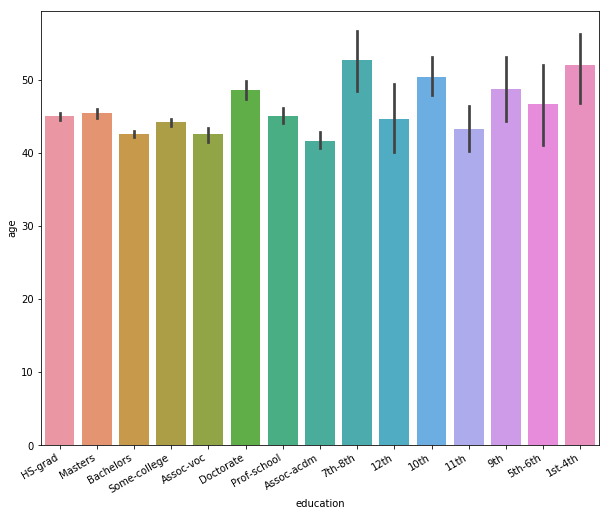

In [9]:
import seaborn as sns
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
sns.barplot(x="education", y="age", data=salary_gt_50k,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.show()

In [10]:
print(salary_gt_50k['age'].std())
print(salary_gt_50k['age'].mean())

10.51902771985177
44.24984058155847


#### 5. What are the mean and standard deviation of age for those who earn less than 50K per year?

In [11]:
salary_le_50k = uci_dataset[uci_dataset['salary'] =='<=50K'] 

In [12]:
print(salary_le_50k['age'].std())
print(salary_le_50k['age'].mean())

14.020088490824813
36.78373786407767


#### 6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)
######  Ans .No

#### 7. Find the maximum age of men of Amer-Indian-Eskimo race.

In [13]:
uci_dataset[uci_dataset['race']=='Amer-Indian-Eskimo']['age'].max()

82

#### married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors. *

In [14]:
def is_bachelor(martial_status):
    if martial_status in ['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']:
        return "married"
    else:
        return "single"
uci_dataset['single_or_married'] = uci_dataset['marital-status'].apply(is_bachelor)

In [15]:
uci_dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,single_or_married
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,single
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,married
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,single
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,married
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,married


In [16]:
uci_dataset['single_or_married'].value_counts()

single     17144
married    15417
Name: single_or_married, dtype: int64

#### 9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them? 

In [17]:
print("Maximum working hours:{0}".format(uci_dataset['hours-per-week'].max()))
people_max_hours = uci_dataset[uci_dataset['hours-per-week'] == uci_dataset['hours-per-week'].max()] 
people_max_hours_count  = len(people_max_hours)
print("Number of people with maximum working hours:{0}".format(people_max_hours_count))
people_max_hours_gt50k =people_max_hours[people_max_hours['salary'] == '>50K']
percent_maxhours_gt50k = (len(people_max_hours_gt50k)/people_max_hours_count)*100
print("Percentage of those who earn a lot (>50K) :{0}".format(percent_maxhours_gt50k))

Maximum working hours:99
Number of people with maximum working hours:85
Percentage of those who earn a lot (>50K) :29.411764705882355


#### 10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan? 

In [18]:
min_salary = uci_dataset.groupby(['salary','native-country'],as_index=False)['native-country','hours-per-week'].mean()
min_salary[min_salary['native-country']=='Japan']

,salary,native-country,hours-per-week
24,<=50K,Japan,41.000000
65,>50K,Japan,47.958333
